# Optimal Risk Preference with Artificial Agent Simulations 
November 2023 A Fink-Skular 

In [2]:
import numpy as np
import random
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize # minimize function is used for parameter recovery 
import seaborn as sns 
from scipy.stats import pearsonr
import statsmodels.api as sm
# import warnings

# #warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings("ignore")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('')
import risk_sim_utils

## Simulation Testing
free parameter: risk aversion 
- non negative
- risk neutral = 1
- risk seeking > 1
- risk averse < 1


In [4]:
risk_aversion = 0.5
rep = 10

df = risk_sim_utils.simulate_gamble_risk(risk_aversion,task_info,rep)
df['Choices'] = np.array(df['ChoicePred'].replace(['gamble','safe'],[1,0]))
df

,rep,tr,ChoicePred,ChoiceProb,util_gamble,util_safe,p_gamble,p_safe,SafeBet,HighBet,LowBet,win_prob,payoff,outcome,total_profit,Choices
0,0,0,gamble,0.999855,4.929503,3.162278,9.998546e-01,0.000145,10,30,0,0.9,30,gamble_win,30,1
1,0,1,safe,0.916444,2.683282,3.162278,8.355627e-02,0.916444,10,20,0,0.6,10,safe,40,0
2,0,2,safe,0.999754,1.500000,3.162278,2.456423e-04,0.999754,10,25,0,0.3,10,safe,50,0
3,0,3,gamble,0.999855,4.929503,3.162278,9.998546e-01,0.000145,10,30,0,0.9,30,gamble_win,80,1
4,0,4,safe,0.997016,2.000000,3.162278,2.984339e-03,0.997016,10,25,0,0.4,10,safe,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,195,safe,0.999686,1.549193,3.162278,3.141199e-04,0.999686,10,15,0,0.4,10,safe,2670,0
1996,9,196,safe,0.985115,2.323790,3.162278,1.488450e-02,0.985115,10,15,0,0.6,10,safe,2680,0
1997,9,197,safe,0.990350,2.236068,3.162278,9.650498e-03,0.990350,10,20,0,0.5,10,safe,2690,0
1998,9,198,gamble,0.972173,3.872983,3.162278,9.721730e-01,0.027827,10,15,0,1.0,15,gamble_win,2705,1


In [149]:
sigmoid = sm.Logit(df['win_prob'], df['Choices']).fit()
print(sigmoid.summary()) 
indiff_pt = sigmoid.predict(0.5)
print(indiff_pt)

Optimization terminated successfully.
         Current function value: 0.571123
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               win_prob   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1999
Method:                           MLE   Df Model:                            0
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.1739
Time:                        19:13:47   Log-Likelihood:                -1142.2
converged:                       True   LL-Null:                       -1382.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Choices        1.6656      0.111     15.043      0.000       1.449       1.883

Possibly complete quasi-sepa

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


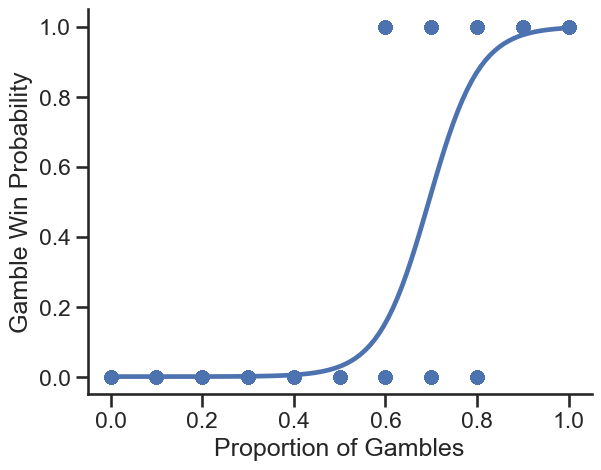

In [150]:
fig, ax = plt.subplots(1,1, figsize=(6.5,5))

sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.set_context('talk')
sns.regplot(data=df,x='win_prob',y='Choices',ci=None,logistic=True)
plt.ylabel('Gamble Win Probability')
plt.xlabel('Proportion of Gambles')
ax.spines[['top', 'right']].set_visible(False)

# Risk Parameter Distribution

free parameter: risk aversion 
- non negative
- risk neutral = 1 
- risk averse < 1 (0 to 1 by 0.05)
- risk seeking > 1 (1 to 2 by 0.05)


### Risk Neutral Simulations
risk = 1

In [5]:
risk_neutral = 1
rep = 100
neutral_df = risk_sim_utils.simulate_gamble_risk(risk_neutral,task_info,rep)
neutral_df['Choices'] = np.array(neutral_df['ChoicePred'].replace(['gamble','safe'],[1,0]))
neutral_df

,rep,tr,ChoicePred,ChoiceProb,util_gamble,util_safe,p_gamble,p_safe,SafeBet,HighBet,LowBet,win_prob,payoff,outcome,total_profit,Choices
0,0,0,gamble,1.000000,27.0,10,1.000000e+00,1.216099e-37,10,30,0,0.9,30,gamble_win,30,1
1,0,1,gamble,0.999955,12.0,10,9.999546e-01,4.539787e-05,10,20,0,0.6,20,gamble_win,50,1
2,0,2,safe,0.999996,7.5,10,3.726639e-06,9.999963e-01,10,25,0,0.3,10,safe,60,0
3,0,3,gamble,1.000000,27.0,10,1.000000e+00,1.216099e-37,10,30,0,0.9,30,gamble_win,90,1
4,0,4,safe,0.500000,10.0,10,5.000000e-01,5.000000e-01,10,25,0,0.4,10,safe,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,99,195,safe,1.000000,6.0,10,2.061154e-09,1.000000e+00,10,15,0,0.4,10,safe,2625,0
19996,99,196,safe,0.993307,9.0,10,6.692851e-03,9.933071e-01,10,15,0,0.6,10,safe,2635,0
19997,99,197,safe,0.500000,10.0,10,5.000000e-01,5.000000e-01,10,20,0,0.5,10,safe,2645,0
19998,99,198,gamble,1.000000,15.0,10,1.000000e+00,1.388794e-11,10,15,0,1.0,15,gamble_win,2660,1


In [6]:
neutral_sigmoid = sm.Logit(neutral_df['win_prob'], neutral_df['Choices']).fit()
print(neutral_sigmoid.summary()) 
neutral_indiff_pt = neutral_sigmoid.predict(0.5)
print(neutral_indiff_pt)

Optimization terminated successfully.
         Current function value: 0.588652
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               win_prob   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19999
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                  0.1485
Time:                        17:38:51   Log-Likelihood:                -11773.
converged:                       True   LL-Null:                       -13827.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Choices        1.0795      0.023     46.255      0.000       1.034       1.125
[0.63174959]


In [7]:
neutral_indiff_pt

array([0.63174959])

In [8]:
neutral_profits = neutral_df['total_profit'][neutral_df.tr==199]
neutral_profit = np.mean(neutral_profits) 
neutral_profit

2734.6

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


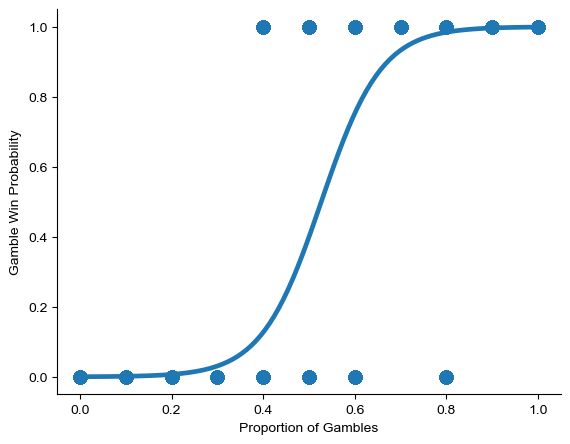

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6.5,5))

sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.set_context('talk')
line = sns.regplot(data=neutral_df,x='win_prob',y='Choices',ci=None,logistic=True)
plt.ylabel('Gamble Win Probability')
plt.xlabel('Proportion of Gambles')
ax.spines[['top', 'right']].set_visible(False)

curve_values = line.get_lines()[0].get_xdata()


### Risk Averse Simulations
risk averse < 1 \
range = 0.05 to 1 by 0.05


In [14]:
risk_averse = np.arange(0.05, 1, 0.05)
rep = 500

averse_dict = {}

for a in risk_averse:
    averse_df = risk_sim_utils.simulate_gamble_risk(a,task_info,rep)
    averse_df['Choices'] = np.array(averse_df['ChoicePred'].replace(['gamble','safe'],[1,0]))
    averse_dict[a] = averse_df

In [ ]:
averse_indiff_pts = []
averse_profits = []

for a in averse_dict.keys():
    data = averse_dict[a]
    sigmoid = sm.Logit(data['win_prob'], data['Choices']).fit()
    indiff_pt = sigmoid.predict(0.5)[0]
    averse_indiff_pts.append(indiff_pt)
    final_profits = data['total_profit'][data.tr==199]
    averse_profits.append(np.mean(final_profits)) #mean profit for each risk param 


Relate Indifference Points and Risk Aversion Parameter
- indifference point should decrease as risk aversion increases (approaches risk neutral)

<Axes: >

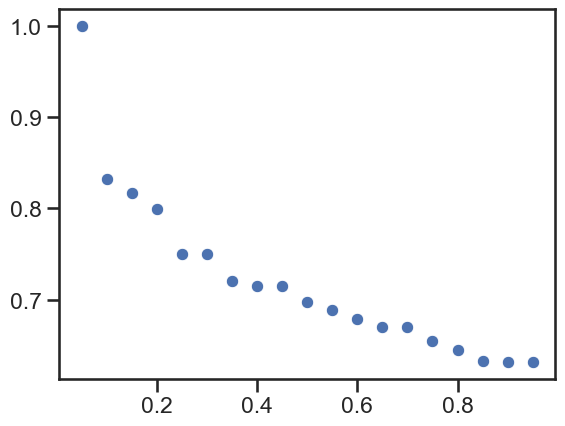

In [16]:
sns.scatterplot(x=risk_averse,y=averse_indiff_pts)

<Axes: >

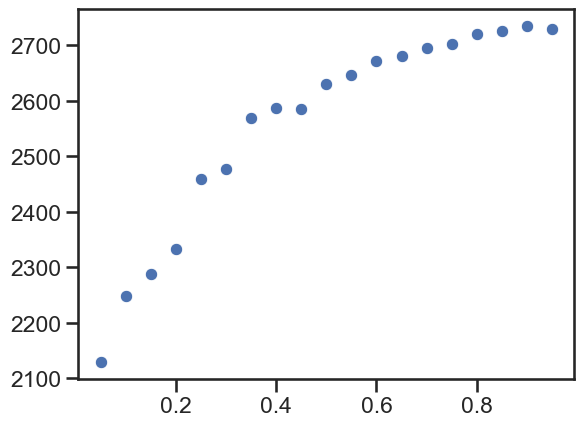

In [18]:
sns.scatterplot(x=risk_averse,y=averse_profits)


<Axes: >

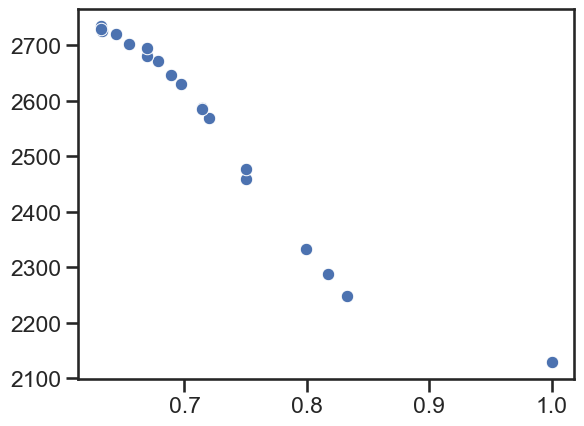

In [19]:
sns.scatterplot(x=averse_indiff_pts,y=averse_profits)


### Risk Seeking Simulations
risk seeking > 1 \
range = 1 to 2 by 0.05

In [ ]:
risk_seeking = np.arange(1.05, 2.05, 0.05)
rep = 100

seeking_dict = {}

for s in risk_seeking:
    seeking_df = risk_sim_utils.simulate_gamble_risk(s,task_info,rep)
    seeking_df['Choices'] = np.array(seeking_df['ChoicePred'].replace(['gamble','safe'],[1,0]))
    seeking_dict[s] = seeking_df

In [299]:
seeking_indiff_pts = []
seeking_profits = []

for s in seeking_dict.keys():
    data = seeking_dict[s]
    sigmoid = sm.Logit(data['win_prob'], data['Choices']).fit()
    indiff_pt = sigmoid.predict(0.5)[0]
    seeking_indiff_pts.append(indiff_pt)
    final_profits = data['total_profit'][data.tr==199]
    seeking_profits.append(np.mean(final_profits)) #mean profit for each risk param 

Optimization terminated successfully.
         Current function value: 0.606629
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621651
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.621651
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.621651
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.621651
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.620886
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635292
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635292
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635292
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637426
  

Relate Indifference Points and Risk Aversion Parameter
- indifference point should decrease as risk seeking increases (further from risk neutral)

<Axes: >

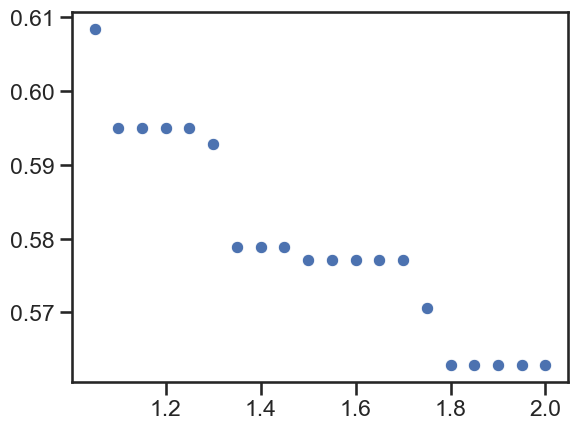

In [300]:
sns.scatterplot(x=risk_seeking,y=seeking_indiff_pts)

<Axes: >

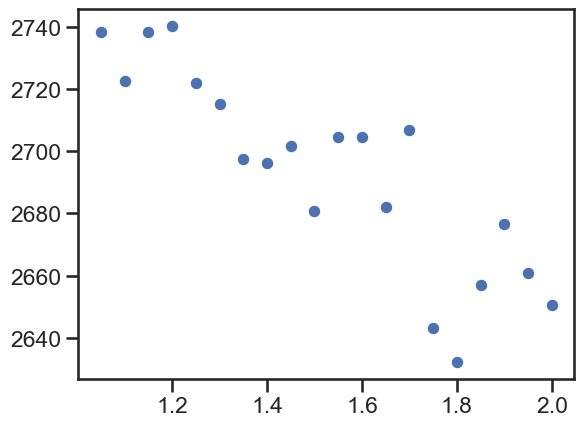

In [301]:
sns.scatterplot(x=risk_seeking,y=seeking_profits)


<Axes: >

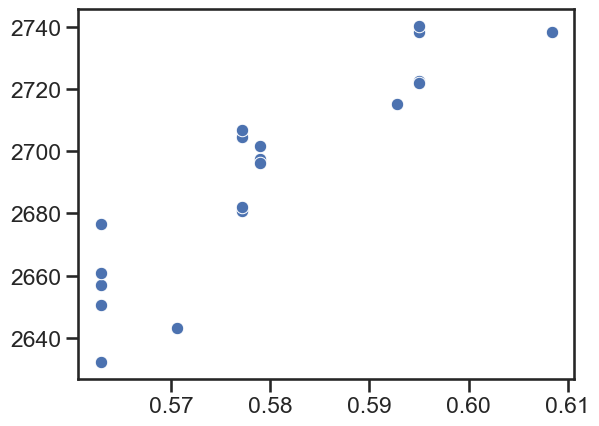

In [302]:
sns.scatterplot(x=seeking_indiff_pts,y=seeking_profits)


Expand range of risk seeking parameter

In [ ]:
risk_seeking = np.arange(1.05, 3.05, 0.1)
rep = 100

seeking_dict = {}

for s in risk_seeking:
    seeking_df = risk_sim_utils.simulate_gamble_risk(s,task_info,rep)
    seeking_df['Choices'] = np.array(seeking_df['ChoicePred'].replace(['gamble','safe'],[1,0]))
    seeking_dict[s] = seeking_df

In [304]:
seeking_indiff_pts = []
seeking_profits = []

for s in seeking_dict.keys():
    data = seeking_dict[s]
    sigmoid = sm.Logit(data['win_prob'], data['Choices']).fit()
    indiff_pt = sigmoid.predict(0.5)[0]
    seeking_indiff_pts.append(indiff_pt)
    final_profits = data['total_profit'][data.tr==199]
    seeking_profits.append(np.mean(final_profits)) #mean profit for each risk param 

Optimization terminated successfully.
         Current function value: 0.606629
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621651
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.621651
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635292
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635292
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637426
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637426
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.643362
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652173
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652173
  

<Axes: >

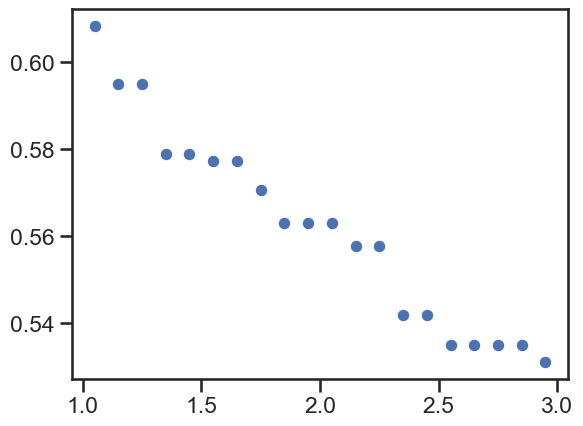

In [305]:
sns.scatterplot(x=risk_seeking,y=seeking_indiff_pts)

<Axes: >

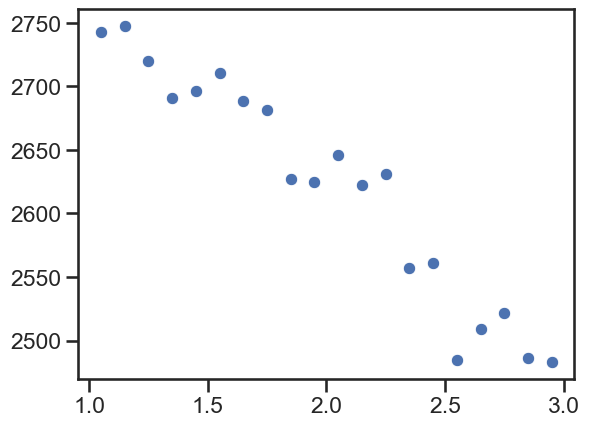

In [306]:
sns.scatterplot(x=risk_seeking,y=seeking_profits)


<Axes: >

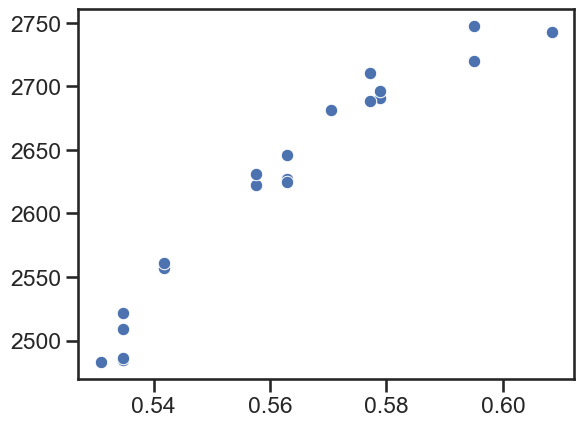

In [307]:
sns.scatterplot(x=seeking_indiff_pts,y=seeking_profits)


# Optimal Risk Attitudes for Profit Maximization

In [5]:
risk_averse = np.arange(0.1, 1, 0.05) #increased to 0.01 spacing 
# risk_seeking = np.arange(1.05, 2.05, 0.05)
risk_seeking = np.arange(1.05, 2.5, 0.05)
risk_neutral = np.array(1)
risk_attitudes = np.hstack((risk_averse,risk_neutral,risk_seeking))

In [6]:
risk_attitudes

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25,
       2.3 , 2.35, 2.4 , 2.45])

In [ ]:
# Simulate 100 agents for 41 risk attitudes (20 risk averse, 1 risk neutral, 20 risk seeking)
rep = 500

risk_dict = {}

for r in risk_attitudes:
    risk_df = risk_sim_utils.simulate_gamble_risk(r,task_info,rep)
    risk_df['Choices'] = np.array(risk_df['ChoicePred'].replace(['gamble','safe'],[1,0]))
    risk_dict[r] = risk_df

In [8]:
risk_indiff_pts = []
risk_profits = []
x_test = np.array([0,1]*20000) #input data for indifference point prediction (gamble probability = 0.5)

for r in risk_dict.keys():
    data = risk_dict[r]
    line = sns.regplot(data=data,x='win_prob',y='Choices',ci=None,logistic=True) #get sigmoid curve from plot
    curve_values = line.get_lines()[0] #get values from curve
    x_vals = curve_values.get_xdata() #get continuous x values (win probs) from curve
    y_vals = curve_values.get_ydata() #get continuous y values (choices) from curve
    plt.close()
    closest_value = min(y_vals, key=lambda x: abs(0.5 - x)) #find closest y val (choice) to 0.5 (choices are indifferent)
    print(closest_value)
    print(np.where(y_vals==closest_value)[0])
    indiff_pt = x_vals[np.where(y_vals==closest_value)[0]] #indifference point = win probability at point where choices are 50/50
    print(indiff_pt)
    # model = smf.glm(formula = 'Choices ~ win_prob', data=data, family=sm.families.Binomial())
    # result = model.fit()
    # predictions = result.predict()
    # indiff_pt = np.mean(predictions)
    # sigmoid = sm.Logit(data['win_prob'],data['Choices']).fit()
    # indiff_pt = np.mean(sigmoid.predict(x_test))
    # indiff_pt = np.mean(sigmoid.predict(data['win_prob']))
    risk_indiff_pts.append(indiff_pt[0])
    final_profits = data['total_profit'][data.tr==199]
    risk_profits.append(np.mean(final_profits)) #mean profit for each risk param 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0.2576284960496904
[89]
[0.8989899]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0.3828884171338111
[89]
[0.8989899]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0.6619105246560326
[89]
[0.8989899]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneA

In [28]:
r, p = pearsonr(x=risk_attitudes, y=risk_indiff_pts)
print(r)
print(p)

-0.979059295004489
1.8982530799701927e-33


In [9]:
####set theme for all plots
sns.set_theme(style='ticks',font='Arial') 
sns.set_context("talk")

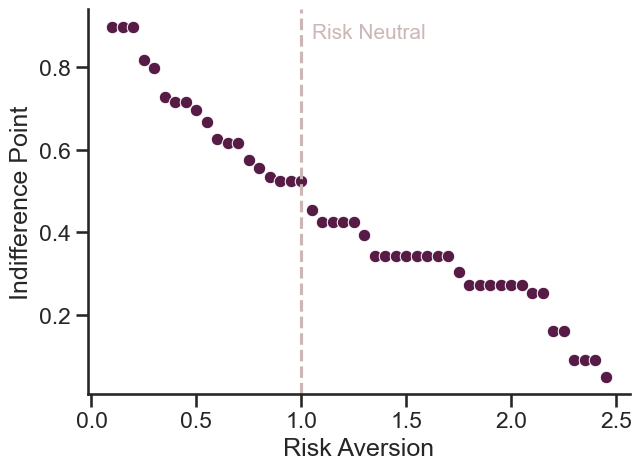

In [13]:
fig,ax = plt.subplots(figsize=(7,5))
sns.scatterplot(x=risk_attitudes,y=risk_indiff_pts,color="#561C46")
ax.set_xlabel('Risk Aversion')
ax.set_ylabel('Indifference Point',x=0.025)
plt.axvline(x=1, color='#CDB6B6',linestyle="--")
ax.text(1.05, 0.87, "Risk Neutral",fontsize=15,color = '#CDB6B6')
sns.despine()


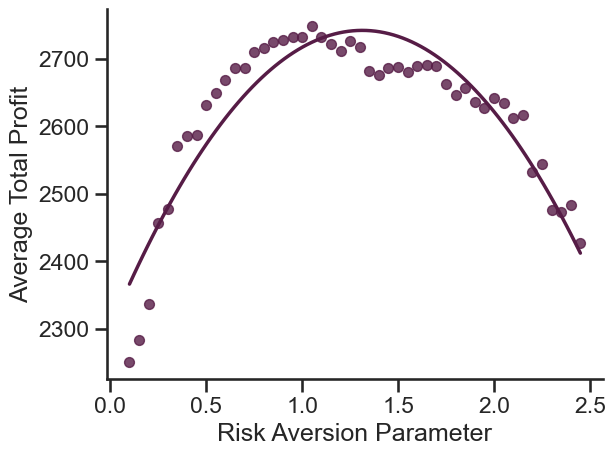

In [14]:
sns.regplot(x=risk_attitudes,y=risk_profits,scatter=True,order=2,ci=None,color="#561C46",scatter_kws={'s':50},line_kws={'linewidth':2.5})
plt.ylabel('Average Total Profit')
plt.xlabel('Risk Aversion Parameter')
sns.despine()


In [27]:
optimal_ip = risk_indiff_pts[int(np.where(risk_profits == np.max(risk_profits))[0])]
optimal_ip

/var/folders/xk/q5rxx0ld0hnc9gjlq1dhwqhw0000gn/T/ipykernel_6232/3023500153.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  optimal_ip = risk_indiff_pts[int(np.where(risk_profits == np.max(risk_profits))[0])]


0.4545454545454546

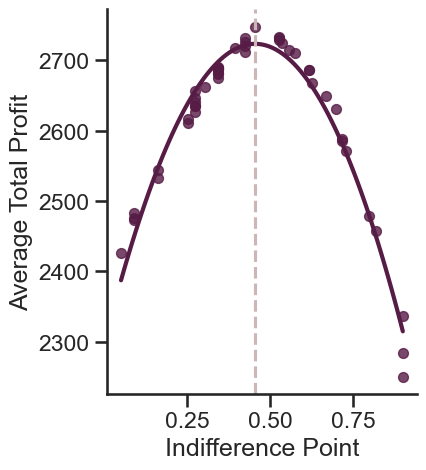

In [32]:
fig,ax = plt.subplots(figsize=(4,5))
sns.regplot(x=risk_indiff_pts,y=risk_profits,scatter=True,order=2,ci=None,color="#561C46",scatter_kws={'s':50},line_kws={'linewidth':3})
plt.xlabel('Indifference Point')
plt.ylabel('Average Total Profit')
plt.axvline(x=optimal_ip, color='#CDB6B6',linestyle="--")
# ax.text(1.05, 0.87, "Risk Neutral",fontsize=15,color = '#CDB6B6')
sns.despine()
